# Capstone Project: Data Science for a Traditional Retail Company

## Introduction and Problem Statement:

This project paints a scenario in a traditional retail company where the management committee is aiming to transit the company into a more data-driven organization by building an internal team to consistently conduct market research on their customers and products. As part of the newly created Data Science team, our first objective is to get managements' buy-in on the importance of building internal data science capabilities to main their support and commitment for further Data Science projects. We intend to achieve this by being more results-oriented in the initial phase of the project.

Below are the main deliverables that we aim to achieve with the marketing team (business users):

- To explore and enhance upon the customer segmentation beyound the current methodlogy of using RFM Analysis.
    - An unsupervised machine learning technique would be used to perform clustering using K-Means.

- To uncover insights and recommend suitable products to our customers.
    - Developing a recommender system based on collaborative filtering with insights from the customer clustering performed.

- Demand Forecasting: Use the sales data to forecast future demand, enabling the management committee to optimize inventory levels and plan coming fiscal accordingly.
    - Will be using Time Series Analysis to make a forecast from the sales data.
    
In a nutshell, a recommender system will be built to recommend the retail items that buyers often purchase together. This is a multi-label classification problem whereby the model performance will be guided by Hit-Rate as success metrics. The implementation of this recommender system would bring value to the marketing team and hence lend towards achieving our first objective of getting managements' buy-in on the importance of Data Science.

notes:
In addition, we will also look at the scalability, adaptability and flexibility of the data science approach, so that in the long run, we can be successful and sustainable. 


# PART 1: Data Cleaning and EDA

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
from math import log

## Load Data
---
Load data that was stored as xlsx file into panda DataFrame. From the data [source](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II), we know that the `CustomerID`, `Invoice` are **Nominal Data** type, so we pre-load the dtype as string as these data could potentially be reflected as numerical data. 
#### Combine the two datasets as a single dataframe
Since both datasets have the same columns (and data types), we can concatenate them into a single dataframe.
In addition, the data in the Excel file is stored as two separate sheets, and hence we would make use of the `sheet_name=None` parameter to load all sheets. 

In [2]:
%%time
retail_df = pd.read_excel('../data/online_retail_II.xlsx', dtype={'Customer ID': str, 'Invoice': str, 'StockCode': str}, sheet_name=None)

CPU times: total: 1min 31s
Wall time: 2min 34s


#### Combine the two datasets as a single dataframe
Since both datasets have the same columns (and data types), we can concatenate them into a single dataframe.

In [3]:
# Reading first sheet as Dataframe
retail_df_first = retail_df[list(retail_df.keys())[0]]
retail_df_first.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [4]:
#Info peek on first dataset
retail_df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  object        
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
# Reading second sheet as Dataframe
retail_df_second = retail_df[list(retail_df.keys())[1]]
retail_df_second.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
#Info peek on second dataset
retail_df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  object        
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
## Concatenate both dataframes into 1
retail_df_all = pd.concat([retail_df_first, retail_df_second])
retail_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.3+ MB


In [8]:
#retail_df_all.to_csv('../data/concated_df.csv', index = False)

### Function: Data Information
---
A function is defined to have a quick check on the following:
- No. of Rows
- No. of Columns
- Data Type
- Total No. of Null Rows 
- No. of Duplicate Rows
- No. of Null Rows per Column

In [9]:
def basic_info(df):
    ''' Input Dataframe
    Output Name of Column & its Data Type, Number of Rows/Columns, Number of Null/Duplicate Rows'''
    print("========== Summary ==========")
    print(df.info())
    
    print("\n=========== Shape ===========")
    print(f"(row, column) = {df.shape}") # prints the shape of the dataset
    
    print("\n====== Total Null/Dup =======")
    # only count rows with at least 1 missing value, does not double count if rows have 2 missing values.
    null_row = sum(df.isnull().T.sum()>=1) 
    print(f"Total Null Rows: {null_row} ({round(null_row*100/len(df), 2)}%)")
    dup_row = df[df.duplicated(keep=False)].shape[0]
    print(f"Total Duplicated Rows: {dup_row} ({round(dup_row*100/len(df), 2)}%)")
     
    if null_row > 0:
        print("\n========= Null Rows =========")
        print(df.isnull().sum())

### Function: Summary Statistics

Two functionst get a quick understanding on the numerical and non-numerical data. 

In [10]:
def summary_stats_numeric(df):
    return df.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

In [11]:
def summary_stats_object(df):
    df_object = df.describe(include='object').T
    
    # create a column to identify the percentage of the top data of each features
    df_object['percentage'] = 100*df_object['freq']/df_object['count']
    return df_object.sort_values('percentage', ascending=False)
    

In [12]:
# peek at first 5 rows
retail_df_all.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


## EDA: First Impression and Summary Statistics
---
The dataset contains 1,067,371 entries with 8 features. They represent the sales transactions for the non-store online retail between 01/12/2009 and 09/12/2011. There are 6.3% of duplicated rows, and 22.77% of rows has missing entries. 

The definition of the features (from the source) and their summary are as follows:
- Invoice: Invoice Number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
    - There are about 50+ thousands of invoices, this would mean that on average there are ~20 entries per invoice. 
    
    
- StockCode: Product (item) code, a 5-digit integral number uniquely assigned to each distinct product.
    - There are > 5000 unique items.
    
    
- Description: Product (item) name
    - There are > 5000 unique item descriptions.
    - There are ~ 4000 missing item descriptions.
    
    
- Quantity: The quantities of each product (item) per transaction was generated.
    - The mean number of quantities sold per line is around 10.
    - There are negative number of quantities, this is probably due to return/cancellation of orders.
    - The min and max quantity negate each other, it could be due to human/system error.
    

- InvoiceDate: Invoice Date and Time when the transaction was generated. 


- Price: Unit Price, product price per unit in British Pound Sterling (£).
    - The average unit price of the products is ~4.64.
    - There are negative entries, which could either be system error or a refund kind of entry.
    
    
- Customer ID: Customer number, a 5-digit integral number uniquely assigned to each customer.
    - It contributes 22.77% of incomplete rows, this should be dropped since we are doing customer segmentation
    
    
- Country: Country name, the name of the country where the customer resides.
    - There are 43 unique nationalities, and about 91.94% of customers reside in the United Kingdom.



In [13]:
# Define function to get a quick summary
basic_info(retail_df_all)

========== Summary ==========
<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.3+ MB
None

=========== Shape ===========
(row, column) = (1067371, 8)

====== Total Null/Dup =======
Total Null Rows: 243007 (22.77%)
Total Duplicated Rows: 67242 (6.3%)

========= Null Rows =========
Invoice             0
StockCode           0
Description      4382
Quantity  

In [14]:
summary_stats_numeric(retail_df_all)

,count,mean,min,1%,5%,25%,50%,75%,95%,99%,max,std
Quantity,1067371.0,9.938898,-80995.0,-3.0,1.0,1.0,3.0,10.0,30.0,100.0,80995.0,172.705794
InvoiceDate,1067371,2011-01-02 21:13:55.394028544,2009-12-01 07:45:00,2009-12-04 12:36:00,2010-01-12 17:15:00,2010-07-09 09:46:00,2010-12-07 15:28:00,2011-07-22 10:23:00,2011-11-22 10:21:00,2011-12-06 13:20:00,2011-12-09 12:50:00,NaN
Price,1067371.0,4.649388,-53594.36,0.21,0.42,1.25,2.1,4.15,9.95,18.0,38970.0,123.553059


In [15]:
summary_stats_object(retail_df_all)

,count,unique,top,freq,percentage
Country,1067371,43,United Kingdom,981330,91.938979
Customer ID,824364,5942,17841,13097,1.58874
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,0.556732
StockCode,1067371,5305,85123A,5829,0.546108
Invoice,1067371,53628,537434,1350,0.126479


## Data Cleaning: Dive deeper to understand the data
---
Objective:
1. Since `StockCode` and `Description` are unique, they should be a 1-1 relationship instead of having 5305:5698 unique values.
    - Created a function `item_list` to have a 1-1 unique item list.
    - The function also excludes non-items such as "M", "Amazon", etc.
    
2. Look into the negative entries in `Quantity`, `Price` and `Invoice`.
    - Created a function `remove_neg` to remove negative quantity/price
    

3. Understand the propotion of customers by `Country`.
    - Would be studying customers from the United Kingdom only as it contributes to 92% of the transactions.
    
    
4. To clean the data using the functions/findings above. 
    - Created another function for data cleaning

   

### Function: Unique Item List

In [16]:
### Function to get 1 Stock Code - 1 Description item list.
def item_list(df, item_code_column, item_desc_column):
    
    # change all item_code to uppercase
    df[item_code_column] = df[item_code_column].apply(lambda x: x.upper())
    
    # create an item list based on groupby item_code, item_desc, using the count of description
    item_list = df[[item_code_column,item_desc_column]].groupby([item_code_column,item_desc_column]).agg({item_desc_column: ['count']}).reset_index()
    
    # rename the item list
    item_list.columns=[item_code_column,'Stock Description','Count']
    
    # get the updated list based on the highest count, so that 1stock code=1 description
    item_list_updated = item_list.sort_values(by='Count', ascending=False).drop_duplicates(subset=item_code_column, keep='first')
    
    # drop the count column
    #item_list_updated.drop(columns='Count', inplace=True)
    
    # to only consider StockCode that starts from 0-9 (digits)
    item_list_updated = item_list_updated[item_list_updated.StockCode.str.contains('^[0-9]')]
    
    # sort them based on their index
    item_list_updated.sort_index(inplace=True)
    
    # reset the index
    item_list_updated.reset_index(drop=True, inplace=True)
    
    print("======= Item List Extracting =======")
    print(f"Total Unique Items: {len(item_list_updated)}\n")
    
    return item_list_updated

### Function: Filter Out Negative Values

In [17]:
# Function to remove invoice containing C and transactions with negative quantity/price
def remove_neg(df):
    
    # original length of dataframe
    original_len = len(df)
    
    # these are predefined conditions
    df.drop(df[(df.Invoice.str.contains('C')) | (df.Quantity <= 0) | (df.Price <= 0)].index, inplace=True)
    
    print("===== Negative Values Cleaning =====")
    print(f"Removed Rows: {original_len - len(df)}\n")
    
    # reset the index
    df.reset_index(drop=True, inplace=True)
    return df

### Function: Filter for Country

In [18]:
def country_filter(df, customers_country):

    # original length of dataframe
    original_len = len(df)
    
    # filter for specific customers' country
    df = df[df.Country == customers_country]
    
    print("=== Customers' Country Cleaning ====")
    print(f"Removed Rows: {original_len - len(df)}\n")
    
    # reset the index
    df.reset_index(drop=True, inplace=True)
    return df

### Function: Overall Data Cleaning
This function performs the following:
- Drops NA customers
- Takes in the Unique Item List to create a new Item Description.
- Filter out StockCode that are non-item based on the Unique Item List
- Filter out Negative Quantity/Price, and removed cancelled invoices.
- To filter for Customers that resides in United Kingdom only.
- Remove Duplicates.

In [19]:
retail_df_all.dropna(subset=['Customer ID'], how='any')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [20]:
#Function to get a clean dataframe
def data_cleaning(df, item_code_column, item_desc_column, customers_country):
    
    # store orignal length of dataframe
    original_len = len(df)
    
    # call defined function (item_list) to generate unique item list
    unique_item_list = item_list(df, item_code_column, item_desc_column).iloc[:,0:2]
    
    # remove original Description Column
    df = df.drop(['Description'], axis = 1)
    
    print("========== Item Cleaning ===========")
    # merge with the item list to get new Stock Description
    df = df.merge(unique_item_list, how='inner', on='StockCode')
    print(f"Removed Rows: {original_len - len(df)}\n")
    
    
    # call defined function (remove_neg) to remove negative entries
    df = remove_neg(df)
    
    # store the current length
    len_df = len(df)
    # drop customer = NA
    df.dropna(subset=['Customer ID'], inplace=True)
    print("====== Customer ID Cleaning ========")
    print(f"Removed Rows: {len_df - len(df)}\n")    
    
    # call defined function (country_filter) to filter for selected country
    df = country_filter(df, customers_country)
    
    # store the current length
    len_df = len(df)
    
    # drop duplicated rows 
    df = df.drop_duplicates()
    
    print("======= Duplicates Cleaning ========")
    print(f"Removed Rows: {len_df - len(df)}\n")
    
    # sort by Invoice and reset the index of dataframe
    df.sort_values(by='Invoice',inplace=True)
    
    df.reset_index(drop=True, inplace=True)

    
    print("========= Overall Cleaning =========")
    print(f"Total Removed Rows: {original_len - len(df)}\n")
    
    return df
    

In [21]:
# call the finalized function for data cleaning, data_cleaning

retail_cleaned_df = data_cleaning(retail_df_all, 'StockCode', 'Description', 'United Kingdom')
retail_cleaned_df.info()

======= Item List Extracting =======
Total Unique Items: 4738

========== Item Cleaning ===========
Removed Rows: 6432

===== Negative Values Cleaning =====
Removed Rows: 24062

====== Customer ID Cleaning ========
Removed Rows: 234245

=== Customers' Country Cleaning ====
Removed Rows: 78192

======= Duplicates Cleaning ========
Removed Rows: 24834

========= Overall Cleaning =========
Total Removed Rows: 367765

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699606 entries, 0 to 699605
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            699606 non-null  object        
 1   StockCode          699606 non-null  object        
 2   Quantity           699606 non-null  int64         
 3   InvoiceDate        699606 non-null  datetime64[ns]
 4   Price              699606 non-null  float64       
 5   Customer ID        699606 non-null  object        
 6   Country            

In [22]:
retail_cleaned_df['Customer ID'].isnull().sum()

0

In [23]:
basic_info(retail_cleaned_df)

========== Summary ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699606 entries, 0 to 699605
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            699606 non-null  object        
 1   StockCode          699606 non-null  object        
 2   Quantity           699606 non-null  int64         
 3   InvoiceDate        699606 non-null  datetime64[ns]
 4   Price              699606 non-null  float64       
 5   Customer ID        699606 non-null  object        
 6   Country            699606 non-null  object        
 7   Stock Description  699606 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 42.7+ MB
None

=========== Shape ===========
(row, column) = (699606, 8)

====== Total Null/Dup =======
Total Null Rows: 0 (0.0%)
Total Duplicated Rows: 0 (0.0%)


### `StockCode` and `Description`
Below are some exploratory stage for the development of a function to get the 1-1 unique item list. Here are some key observations:
1. Realised that StockCode has upper and lower cases that are representing the same item, and hence we would capitalize them. e.g. 85123A = 85123a


2. There are StockCodes with different Descriptions (such as 85123A), hence, it would be more meaningful to create a new column to identify the actual/main item name. e.g. 85123A should be White Hanging Heart T-Light Holder.


3. Filter for StockCodes that start from 0-9 only. 


In [24]:
# realised that 85123A has a range of description
retail_df_all[(retail_df_all.StockCode=='85123A')].Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
CREAM HANGING HEART T-LIGHT HOLDER       9
21733 mixed                              1
?                                        1
wrongly marked carton 22804              1
Name: count, dtype: int64

In [25]:
# realised that 85123a is essentially 85123A
retail_df_all[(retail_df_all.StockCode=='85123a')].Description.value_counts()

Series([], Name: count, dtype: int64)

In [26]:
retail_df_all[(retail_df_all.StockCode=='85123A') | (retail_df_all.StockCode=='85123a')].Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
CREAM HANGING HEART T-LIGHT HOLDER       9
21733 mixed                              1
?                                        1
wrongly marked carton 22804              1
Name: count, dtype: int64

In [27]:
retail_df_all[retail_df_all.Description=='WHITE HANGING HEART T-LIGHT HOLDER'].StockCode.value_counts()

StockCode
85123A    5918
Name: count, dtype: int64

In [28]:
# example of non-item StockCode/Description - 'Bank Charges?'

retail_df_all[retail_df_all.Description=='Bank Charges']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114180,C500319,BANK CHARGES,Bank Charges,-11,2010-03-07 12:02:00,0.96,NaN,United Kingdom
115208,C500352,BANK CHARGES,Bank Charges,-1,2010-03-07 15:08:00,11.29,NaN,United Kingdom
118558,C500708,BANK CHARGES,Bank Charges,-1,2010-03-09 13:56:00,372.30,NaN,United Kingdom
136411,C502459,BANK CHARGES,Bank Charges,-1,2010-03-24 14:25:00,39.24,NaN,United Kingdom
143558,C503050,BANK CHARGES,Bank Charges,-1,2010-03-29 15:38:00,25.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
440745,574546,BANK CHARGES,Bank Charges,1,2011-11-04 14:59:00,15.00,13651,United Kingdom
481152,C577342,BANK CHARGES,Bank Charges,-1,2011-11-18 15:11:00,490.06,NaN,United Kingdom
481153,C577343,BANK CHARGES,Bank Charges,-1,2011-11-18 15:13:00,27.21,NaN,United Kingdom
506357,579137,BANK CHARGES,Bank Charges,1,2011-11-28 12:51:00,15.00,14704,United Kingdom


#### Comment:

These data would most likely be dropped at the later stage as it is non-item related, and isnt meaningful for our analysis.

In [29]:
# example of non-item StockCode/Description - 'check?'

retail_df_all[retail_df_all.Description=='check?']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
489200,577959,85107,check?,374,2011-11-22 12:11:00,0.0,NaN,United Kingdom


In [30]:
# example of non-item StockCode/Description - 'found'

retail_df_all[retail_df_all.Description=='found']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
113350,500248,17109B,found,72,2010-03-05 12:43:00,0.0,NaN,United Kingdom
118074,500657,22077,found,24,2010-03-09 11:22:00,0.0,NaN,United Kingdom
365004,524749,16151A,found,50,2010-09-30 15:07:00,0.0,NaN,United Kingdom
51757,540673,21644,found,144,2011-01-10 16:04:00,0.0,NaN,United Kingdom
132630,547673,47593A,found,13,2011-03-24 13:57:00,0.0,NaN,United Kingdom
166645,550950,17091A,found,84,2011-04-21 16:14:00,0.0,NaN,United Kingdom
242709,558369,21082,found,3,2011-06-28 15:40:00,0.0,NaN,United Kingdom
246774,558725,84944,found,37,2011-07-01 14:31:00,0.0,NaN,United Kingdom
254712,559335,21147,found,72,2011-07-07 15:57:00,0.0,NaN,United Kingdom
267597,560329,35965,found,6,2011-07-18 11:07:00,0.0,NaN,United Kingdom


#### Comment:

These data seems to be related to inventory adjustment. it would most likely be dropped at the later stage as it is non-sales item related, and isnt meaningful for our analysis.

In [31]:
# example of non-item StockCode/Description - 'damaged'

retail_df_all[retail_df_all.Description=='damaged']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
17427,490765,21450,damaged,-31,2009-12-08 10:59:00,0.0,NaN,United Kingdom
41349,492787,85112,damaged,-38,2009-12-18 17:45:00,0.0,NaN,United Kingdom
41350,492790,37503,damaged,-19,2009-12-18 17:46:00,0.0,NaN,United Kingdom
101075,498930,72754A,damaged,-62,2010-02-24 10:24:00,0.0,NaN,United Kingdom
117403,500562,84839,damaged,-26,2010-03-08 15:37:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
474647,576843,10133,damaged,-82,2011-11-16 15:32:00,0.0,NaN,United Kingdom
489243,577999,21018,damaged,-63,2011-11-22 12:29:00,0.0,NaN,United Kingdom
492198,578095,23397,damaged,-9,2011-11-22 17:25:00,0.0,NaN,United Kingdom
500145,578733,21643,damaged,-9,2011-11-25 11:32:00,0.0,NaN,United Kingdom


#### Comment:

These data seems to be related to inventory adjustment. it would most likely be dropped at the later stage as it is non-sales item related, and isnt meaningful for our analysis.

In [32]:
# example of non-item StockCode/Description - 'amazon'

retail_df_all[retail_df_all.Description=='amazon']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
509329,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
509330,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
518589,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom
24358,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,NaN,United Kingdom
311177,564229,82583,amazon,20,2011-08-24 10:20:00,0.0,NaN,United Kingdom
314575,564645,82583,amazon,44,2011-08-26 13:38:00,0.0,NaN,United Kingdom
488491,577829,85231G,amazon,1,2011-11-22 09:55:00,0.0,NaN,United Kingdom


#### Comment:
These data seems to be user-entry, and there is only a small fraction of such data, it should be dropped at the later stage (Price = 0) as it isn't meaningful for our analysis.

In [33]:
# example of non-item StockCode/Description - 'Manual'

retail_df_all[retail_df_all.Description=='Manual']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom


#### Comment:
These data seems to be user-entry, it should be dropped at the later stage since it is non-item related, hence it isn't meaningful for our analysis.

# all the descriptions and its count

pd.DataFrame(retail_df_all.Description.value_counts())

In [34]:
# create an item list based on groupby item_code, item_desc, using the count of description
unique_items = retail_df_all[['StockCode','Description']].groupby(['StockCode','Description']).agg({'Description': ['count']}).reset_index()
    
# rename the item list
unique_items.columns=['StockCode','Description','Count']

# list of unique items and their descriptions
unique_items

,StockCode,Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,398
1,10002R,ROBOT PENCIL SHARPNER,3
2,10080,GROOVY CACTUS INFLATABLE,28
3,10080,check,1
4,10109,BENDY COLOUR PENCILS,1
...,...,...,...
6367,POST,POSTAGE,2115
6368,S,SAMPLES,104
6369,SP1002,KID'S CHALKBOARD/EASEL,2
6370,TEST001,This is a test product.,15


#### Comment:
From here we can see that StockCode = 10080 should actually be GROOVY CACTUS INFLATABLE.

In [35]:
unique_items.tail(55)

,StockCode,Description,Count
6317,90214U,"LETTER ""U"" BLING KEY RING",2
6318,90214V,"LETTER ""V"" BLING KEY RING",27
6319,90214W,"LETTER ""W"" BLING KEY RING",8
6320,90214Y,"LETTER ""Y"" BLING KEY RING",11
6321,90214Z,"LETTER ""Z"" BLING KEY RING",19
6322,ADJUST,Adjustment by Peter on 24/05/2010 1,3
6323,ADJUST,Adjustment by john on 26/01/2010 16,38
6324,ADJUST,Adjustment by john on 26/01/2010 17,26
6325,ADJUST2,Adjustment by Peter on Jun 25 2010,3
6326,AMAZONFEE,AMAZON FEE,43


#### Comment:
From the above, we know that it is is not meaningful to analyse StockCodes that starts from letters A-Z, a-z. Hence, eventually, , we will have to filter off these StockCodes.

#### Comment:
To place this in the function.

In [36]:
# call the function created
new_item = item_list(retail_df_all, 'StockCode', 'Description')

======= Item List Extracting =======
Total Unique Items: 4738



In [37]:
# difference in the item before and after 

a = list(new_item.StockCode)
b = list(pd.DataFrame(retail_df_all.StockCode.value_counts()).index)

# list of item code not appearing in the updated list (due to missing descriptions)
print(set(b) - set(a))
print(len(set(b) - set(a)))

{'21024', '35473', '47285B', '84247B', '79053D', '37493B', '72778', '16161N', '72234', '71265', '35632A', '79071A', '79003B', '72754C', '44266F', 'DCGS0076', '84845B', '47284V', '72798A', '85148', '79053B', '79065B', '72671B', '72331R', '72768', '85223', '35980A', '16240', '47559', '48172', '21362', '84389', 'DCGS0057', '72697A', '79064C', 'DCGS0062', '21052', '20904', '21227', '84439B', '72719', 'C2', '16210', '84571', '85226B', '37477D', '79082C', 'DCGS0044', '47595B', '84898E', '16222B', '37452A', '90197C', '72798B', '84718', '84341A', 'ADJUST2', '20951', '84248E', '21863', '35935', '37445D', '85120', '21273', '35631A', '84519D', '16201C', '20824', '71431', '21583', 'GIFT_0001_90', '90097', '84927C', '21057', '72752C', '20965', '21176', '20946', 'DCGS0068', '21048', '20720', 'DCGS0060', '37353', '79142', '21182', '84585L', 'GIFT_0001_60', '84775', '72655C', '84600A', 'ADJUST', '72024HC', '84871', '21602', '84873B', '84972M', '16195', '20859', '35941', '21753', '84877C', '84449', 'DC

In [38]:
# e.g. of items that has NaN description, and hence would not be appearing in the updated list
retail_df_all[(retail_df_all.StockCode=='45008L') | (retail_df_all.StockCode=='DCGS0060')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.0,NaN,United Kingdom
81148,496859,45008L,NaN,-5,2010-02-04 12:01:00,0.0,NaN,United Kingdom


In [39]:
# display top 10 item
new_item.head(10)

,StockCode,Stock Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,398
1,10002R,ROBOT PENCIL SHARPNER,3
2,10080,GROOVY CACTUS INFLATABLE,28
3,10109,BENDY COLOUR PENCILS,1
4,10120,DOGGY RUBBER,78
5,10123C,HEARTS WRAPPING TAPE,69
6,10123G,ARMY CAMO WRAPPING TAPE,18
7,10124A,SPOTS ON RED BOOKCOVER TAPE,19
8,10124G,ARMY CAMO BOOKCOVER TAPE,11
9,10125,MINI FUNKY DESIGN TAPES,181


In [40]:
new_item.iloc[:,0:2]

,StockCode,Stock Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10002R,ROBOT PENCIL SHARPNER
2,10080,GROOVY CACTUS INFLATABLE
3,10109,BENDY COLOUR PENCILS
4,10120,DOGGY RUBBER
...,...,...
4733,90214U,"LETTER ""U"" BLING KEY RING"
4734,90214V,"LETTER ""V"" BLING KEY RING"
4735,90214W,"LETTER ""W"" BLING KEY RING"
4736,90214Y,"LETTER ""Y"" BLING KEY RING"


In [41]:
# display bottom 50 item
new_item.tail(50)

,StockCode,Stock Description,Count
4688,90201A,PURPLE ENAMEL FLOWER RING,55
4689,90201B,BLACK ENAMEL FLOWER RING,59
4690,90201C,RED ENAMEL FLOWER RING,47
4691,90201D,GREEN ENAMEL FLOWER RING,58
4692,90202A,PURPLE ENAMEL FLOWER HAIR TIE,24
4693,90202B,WHITE ENAMEL FLOWER HAIR TIE,17
4694,90202C,GREEN ENAMEL FLOWER HAIR TIE,27
4695,90202D,PINK ENAMEL FLOWER HAIR TIE,25
4696,90203,SILVER CHARM NECKLACE 70CM,36
4697,90204,PAIR OF ENAMEL BUTTERFLY HAIRCLIP,39


#### Comment:
Noticed that items that start with non-digits are not very meaningful. Hence we will drop them.

In [42]:
# filter for the list of stockcodes that only start from 0-9 (proper items)
new_item[new_item.StockCode.str.contains('^[0-9]')]

,StockCode,Stock Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,398
1,10002R,ROBOT PENCIL SHARPNER,3
2,10080,GROOVY CACTUS INFLATABLE,28
3,10109,BENDY COLOUR PENCILS,1
4,10120,DOGGY RUBBER,78
...,...,...,...
4733,90214U,"LETTER ""U"" BLING KEY RING",2
4734,90214V,"LETTER ""V"" BLING KEY RING",27
4735,90214W,"LETTER ""W"" BLING KEY RING",8
4736,90214Y,"LETTER ""Y"" BLING KEY RING",11


### `Quantity`  `Price` and `Invoice`
Below are some exploratory phase to develop a function to handle the Invoice that starts with C, as well as quantity and price that is below and equal to 0.  
1. To explore on the Invoice that contains C.
    - These are the cancellation, and they have negative quantity, we will drop them.
2. To explore on the transactions with negative quantity and/or negative price
    - These are usually the cases whereby it is cancellation, negative adjustments in the inventory, or damages

In [43]:
# example of invoice with C (cancellation), hence expect it to have negative quantity

retail_df_all[retail_df_all.Invoice.str.contains('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


#### Comment:
We can drop these data as they are having negative quantity

In [44]:
## This is an example of a "consolidated billing", whereby the invoice is billed together (manual)

retail_df_all[retail_df_all.Invoice=='553539']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
193551,553539,22425,ENAMEL COLANDER CREAM,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193552,553539,22414,DOORMAT NEIGHBOURHOOD WITCH,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193553,553539,22301,COFFEE MUG CAT + BIRD DESIGN,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193554,553539,22201,FRYING PAN BLUE POLKADOT,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193555,553539,21922,UNION STRIPE WITH FRINGE HAMMOCK,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193556,553539,22692,DOORMAT WELCOME TO OUR HOME,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193557,553539,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193558,553539,21116,OWL DOORSTOP,2,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193559,553539,20711,JUMBO BAG TOYS,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom
193560,553539,20682,RED RETROSPOT CHILDRENS UMBRELLA,1,2011-05-17 15:27:00,0.00,NaN,United Kingdom


#### Comment:
The StockCode M will be dropped, as it is manually entered and does not seem to be meaningful. 

In [45]:
# create a df to store negative (incl 0) and positive counts of Quantity and Price
neg_pos = pd.DataFrame(columns=['Count of Quantity', 'Count of Price'], index=['Negative', 'Positive'])
neg_pos['Count of Quantity'] = [retail_df_all[['Quantity']][retail_df_all.Quantity <= 0].count()[0], retail_df_all[['Quantity']][retail_df_all.Quantity > 0].count()[0]]
neg_pos['Count of Price']    = [retail_df_all[['Price']][retail_df_all.Price <= 0].count()[0], retail_df_all[['Price']][retail_df_all.Price > 0].count()[0]]
neg_pos

,Count of Quantity,Count of Price
Negative,22950,6207
Positive,1044421,1061164


In [46]:
# display 20 transactions with quantity <=0 
retail_df_all[retail_df_all.Quantity <= 0].sample(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
100263,498873,84963A,NaN,-2,2010-02-23 12:28:00,0.00,NaN,United Kingdom
203404,C509015,22559,SEASIDE FLYING DISC,-4,2010-05-19 13:36:00,1.25,14598,United Kingdom
193998,507863,20935,NaN,-37,2010-05-11 14:55:00,0.00,NaN,United Kingdom
263143,C559939,22937,BAKING MOULD CHOCOLATE CUPCAKES,-6,2011-07-14 10:19:00,2.55,14426,United Kingdom
92027,498073,84621,NaN,-2,2010-02-16 12:19:00,0.00,NaN,United Kingdom
235893,C557648,22197,POPCORN HOLDER,-3,2011-06-21 17:14:00,0.72,17677,United Kingdom
52434,C540792,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2011-01-11 11:50:00,3.75,16203,United Kingdom
82994,497014,35004S,NaN,-9,2010-02-05 12:37:00,0.00,NaN,United Kingdom
363321,C568562,22654,DELUXE SEWING KIT,-1,2011-09-27 16:48:00,5.95,17002,United Kingdom
385504,C570203,23089,GLASS BON BON JAR,-1,2011-10-07 16:49:00,1.65,15311,United Kingdom


#### Comment:
These are related to cancelled invoice, which we will ultimately remove.

In [47]:
# display 20 transactions with price <= 0 
retail_df_all[retail_df_all.Price <= 0].sample(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
354121,567863,35598A,NaN,8,2011-09-22 14:03:00,0.0,NaN,United Kingdom
476866,577037,72817,dotcomstock,4,2011-11-17 13:27:00,0.0,NaN,United Kingdom
332992,521930,21761,NaN,-4,2010-09-09 15:29:00,0.0,NaN,United Kingdom
256099,514102,22423,damaged,-14,2010-06-30 12:32:00,0.0,NaN,United Kingdom
6576,489901,21098,NaN,-200,2009-12-03 09:47:00,0.0,NaN,United Kingdom
346850,567208,35597D,NaN,2,2011-09-19 11:01:00,0.0,NaN,United Kingdom
280756,561500,85040B,NaN,-1,2011-07-27 14:12:00,0.0,NaN,United Kingdom
242419,558340,22680,FRENCH BLUE METAL DOOR SIGN 5,4,2011-06-28 14:01:00,0.0,NaN,United Kingdom
10508,490165,21493,NaN,-106,2009-12-04 11:32:00,0.0,NaN,United Kingdom
200969,508715,37379B,NaN,-2,2010-05-17 17:17:00,0.0,NaN,United Kingdom


#### Comment:
These looks like some inventory adjustment or "free gifts", hence it might not be meaningful.

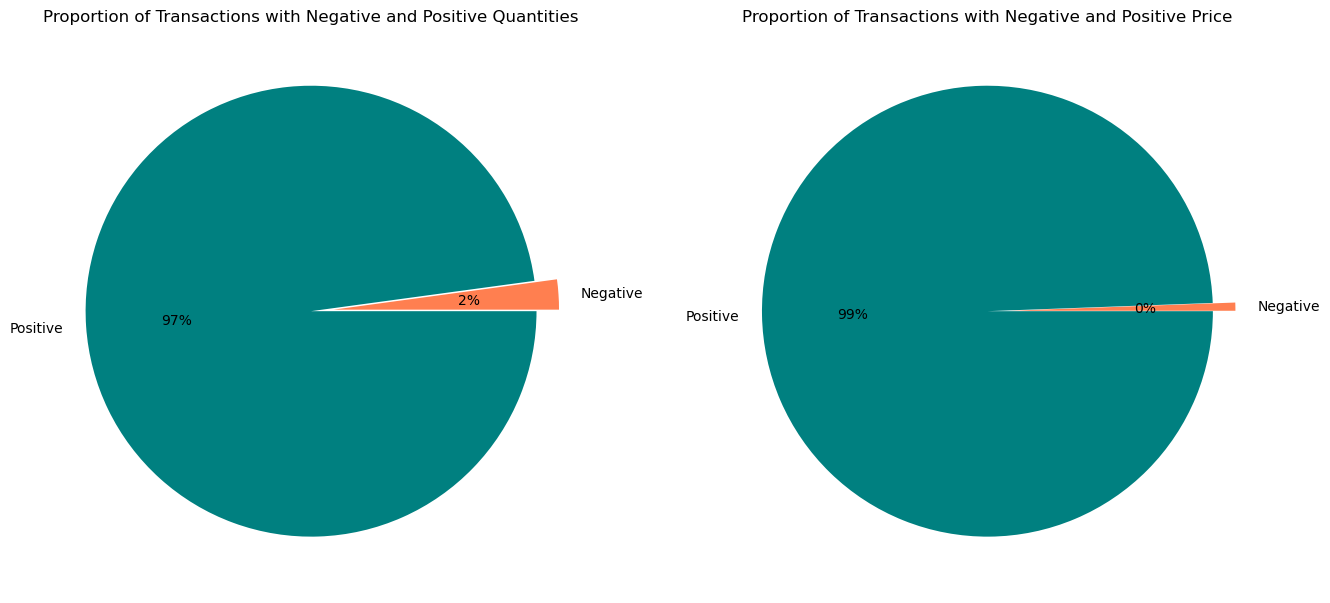

In [48]:
import matplotlib.pyplot as plt

# Your existing code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
#plt.figure(figsize=(10,8))

# Change the color to teal
#teal_color = '#008080'

# Plotting the first pie chart
axes[0].pie(neg_pos['Count of Quantity'], labels=['Negative', 'Positive'], autopct='%1d%%', explode=(0.1, 0), colors=['coral','#008080'])
axes[0].set_title('Proportion of Transactions with Negative and Positive Quantities')

# Plotting the second pie chart
axes[1].pie(neg_pos['Count of Price'], labels=['Negative', 'Positive'], autopct='%1d%%', explode=(0.1, 0), colors=['coral', '#008080'])
axes[1].set_title('Proportion of Transactions with Negative and Positive Price')

plt.show()



#### Comment:
About 2% of the transactions have negative quantity whereas <1% of the transactions have negative price. We can drop them.

In [49]:
df = remove_neg(retail_df_all)
df.info()

===== Negative Values Cleaning =====
Removed Rows: 50645

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016726 entries, 0 to 1016725
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1016726 non-null  object        
 1   StockCode    1016726 non-null  object        
 2   Description  1016726 non-null  object        
 3   Quantity     1016726 non-null  int64         
 4   InvoiceDate  1016726 non-null  datetime64[ns]
 5   Price        1016726 non-null  float64       
 6   Customer ID  786259 non-null   object        
 7   Country      1016726 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.1+ MB


### `Country`
Below are some exploratory on the Country, in conclusion, we will filter for the data to only consider UK customers as it contributes to about 92% of the transactions, and 90% of the customer base is from the UK.

In [50]:
# proportion of transactions by country

retail_df_all.Country.value_counts(normalize=True)

Country
United Kingdom          0.920006
EIRE                    0.016742
Germany                 0.016019
France                  0.013405
Netherlands             0.004880
Spain                   0.003576
Switzerland             0.002999
Belgium                 0.002935
Portugal                0.002472
Australia               0.001745
Channel Islands         0.001525
Italy                   0.001392
Norway                  0.001379
Sweden                  0.001293
Cyprus                  0.001116
Finland                 0.000999
Austria                 0.000889
Denmark                 0.000746
Unspecified             0.000736
Greece                  0.000637
Poland                  0.000500
United Arab Emirates    0.000456
Japan                   0.000454
USA                     0.000394
Israel                  0.000361
Hong Kong               0.000346
Singapore               0.000329
Malta                   0.000269
Iceland                 0.000235
Canada                  0.000224
Li

#### Comment:
Since United Kingdom contributed to about 92% of the transactions, we can drop the rest of the countries so that our analysis could be targeted on a particular country only.

In [51]:
# proportion of the UK customers
retail_df_all[retail_df_all.Country == 'United Kingdom']['Customer ID'].nunique() / retail_df_all['Customer ID'].nunique()

0.910221465076661

#### Comment:
About 91% of the customers reside in the UK

## EDA: Retail Summary and Visualizations
1. Retail Summary
    - Created a function to understand the business perspectives in a quick glance.
    

2. Perform Visualizations 
    - Top 10 by Item Quantity, Amount, and Count
    - Transactions per Month, Day, Hour
    - Correlation

### Function: Pre-processing 1
To add/change following columns:
- Amount = Quantity * Price
- InvoiceDate change to InvoiceDateTime
- InvoiceDate - Date only
- Hour - Hour only

In [52]:
# Create additional Colum using function
def pre_processing_eda(df):
    
    # create Amount as Quantity * Price
    df['Amount'] = df['Quantity'] * df['Price']

    # rename column InvoiceDate
    df = df.rename(columns={"InvoiceDate":"Invoice DateTime"})
    
    # create column InvoiceDate to show only the Date
    df['Invoice Date'] = pd.to_datetime(df['Invoice DateTime']).dt.normalize()
    
    # create Month, Day, Hour 
    df['Month'] = pd.DatetimeIndex(df['Invoice DateTime']).month
    df['Day of Week'] = pd.DatetimeIndex(df['Invoice DateTime']).dayofweek
    df['Hour'] = pd.to_datetime(df['Invoice DateTime'], format='%H:%M').dt.hour
    
    return df


### Function: Retail Summary

In [53]:
#Looking at some details on the dataframe

def retail_summary(df):
    
    print("======== Summary =========")
    print(f"Start Date : {df['Invoice Date'].dt.date.min()}")
    print(f"End Date   : {df['Invoice Date'].dt.date.max()}")
    
    print("\n====== Unique Count ======")
    print(f"Retail Days: {df['Invoice Date'].nunique()}")
    print(f"Invoices   : {df.Invoice.nunique()}")
    print(f"Products   : {df.StockCode.nunique()}")
    print(f"Customers  : {df['Customer ID'].nunique()}")
    #print(f"% of Customers NA: {round(df['Customer ID'].isnull().sum() * 100 / len(df),2)}%")
    
    print("\n========= Sales ==========")
    print(f"Quantity   : {df.Quantity.sum()}")
    print(f"Amount     : {round(df.Amount.sum(),2)}")
    
    print("\n====== Average KPIs ======")
    print(f"Avr Qty per Customer        : {round(df.Quantity.sum() / df['Customer ID'].nunique(),2)}")
    print(f"Avr Revenue per Customer    : {round(df.Amount.sum() / df['Customer ID'].nunique(),2)}")
    print(f"Avr Qty per Transaction     : {round(df.Quantity.sum() / df['Invoice'].nunique(),2)}")
    print(f"Avr Revenue per Transaction : {round(df.Amount.sum() / df['Invoice'].nunique(),2)}")

In [54]:
# display top 5 
retail_cleaned_df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Stock Description
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,22064,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,PINK DOUGHNUT TRINKET POT
2,489434,21523,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,DOORMAT FANCY FONT HOME SWEET HOME
3,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,WHITE CHERRY LIGHTS
4,489434,21871,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,SAVE THE PLANET MUG


In [55]:
# display top 5 after some preprocessing
retail_cleaned_preprocessed_df = pre_processing_eda(retail_cleaned_df)
retail_cleaned_preprocessed_df.head()

,Invoice,StockCode,Quantity,Invoice DateTime,Price,Customer ID,Country,Stock Description,Amount,Invoice Date,Month,Day of Week,Hour
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01,12,1,7
1,489434,22064,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,PINK DOUGHNUT TRINKET POT,39.6,2009-12-01,12,1,7
2,489434,21523,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,DOORMAT FANCY FONT HOME SWEET HOME,59.5,2009-12-01,12,1,7
3,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,WHITE CHERRY LIGHTS,81.0,2009-12-01,12,1,7
4,489434,21871,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,SAVE THE PLANET MUG,30.0,2009-12-01,12,1,7


### Retail Summary

In [56]:
# display summary

retail_summary(retail_cleaned_preprocessed_df)

======== Summary =========
Start Date : 2009-12-01
End Date   : 2011-12-09

====== Unique Count ======
Retail Days: 604
Invoices   : 33361
Products   : 4604
Customers  : 5334

========= Sales ==========
Quantity   : 8522377
Amount     : 14288206.9

====== Average KPIs ======
Avr Qty per Customer        : 1597.75
Avr Revenue per Customer    : 2678.7
Avr Qty per Transaction     : 255.46
Avr Revenue per Transaction : 428.29


#### Comment:
Over the past 2 years (2009-Dec to 2011-Dec), there were 604 days of business, 33,361 unique invoices in total. 4604 unique  products were sold, and there were 5335 customers.

The total sales quantity is 8,522,377 with a sales amount of $14,288,06.

### Data Visualizations 
- Top 10 by Item Quantity, Amount, and Count
- Transactions per Month, Day, Hour
    - Month: More transactions are happening in the Q4 of the year, in retail business, this is usually the case since it is the festive season.
    - Day of the Week: Surprisingly, there is not much trend in terms of the transaction volume across the week. (except that it is usually closed on Friday)
    - Hour: More transactions are happening in the middle of the day. it follows a bell curve.

In [57]:
retail_cleaned_preprocessed_df.info()
retail_cleaned_preprocessed_df.groupby(['StockCode','Stock Description'])['Invoice'].count().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699606 entries, 0 to 699605
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            699606 non-null  object        
 1   StockCode          699606 non-null  object        
 2   Quantity           699606 non-null  int64         
 3   Invoice DateTime   699606 non-null  datetime64[ns]
 4   Price              699606 non-null  float64       
 5   Customer ID        699606 non-null  object        
 6   Country            699606 non-null  object        
 7   Stock Description  699606 non-null  object        
 8   Amount             699606 non-null  float64       
 9   Invoice Date       699606 non-null  datetime64[ns]
 10  Month              699606 non-null  int32         
 11  Day of Week        699606 non-null  int32         
 12  Hour               699606 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(3), 

StockCode  Stock Description                 
85123A     WHITE HANGING HEART T-LIGHT HOLDER    4834
85099B     JUMBO BAG RED RETROSPOT               3020
22423      REGENCY CAKESTAND 3 TIER              2871
84879      ASSORTED COLOUR BIRD ORNAMENT         2544
20725      LUNCH BAG RED RETROSPOT               2314
                                                 ... 
90135      ORANGE/WHT/FUSCHIA STONES NECKLACE       1
90135A     ORANGE/FUSCHIA STONES NECKLACE           1
37408      ASSORTED DESIGN GEISHA GIRL MUGS         1
37379B     BLUE CHERRY BLOSSOM CUP & SAUCER         1
20791      BLUE TILED SET OF 3 DRAWERS              1
Name: Invoice, Length: 4604, dtype: int64

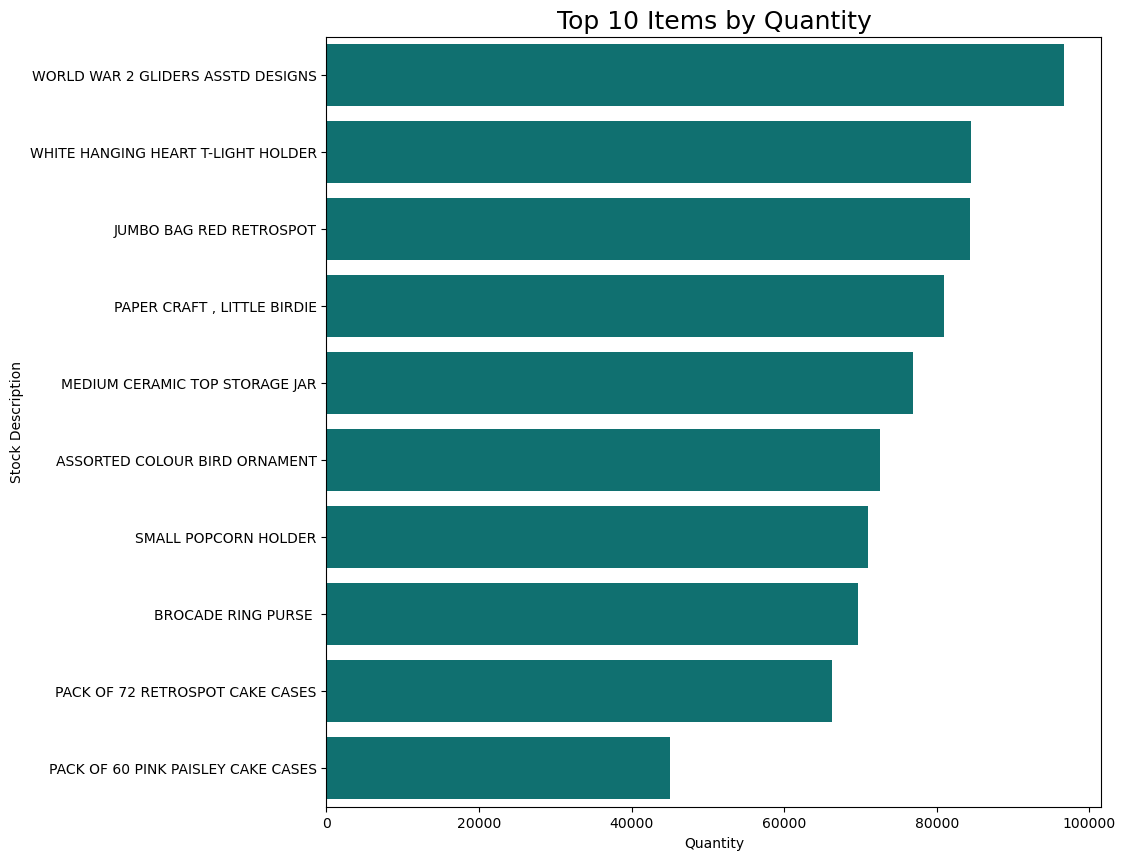

In [58]:
# plot top 10 items with high quantity
plt.figure(figsize=(10,10))
temp = retail_cleaned_preprocessed_df.groupby(['StockCode','Stock Description'])['Quantity'].sum().reset_index()
temp = temp.sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(data=temp, y=temp['Stock Description'], x = temp['Quantity'], color= 'teal')
plt.title('Top 10 Items by Quantity', fontsize=18);
plt.rcParams["axes.labelsize"] = 20

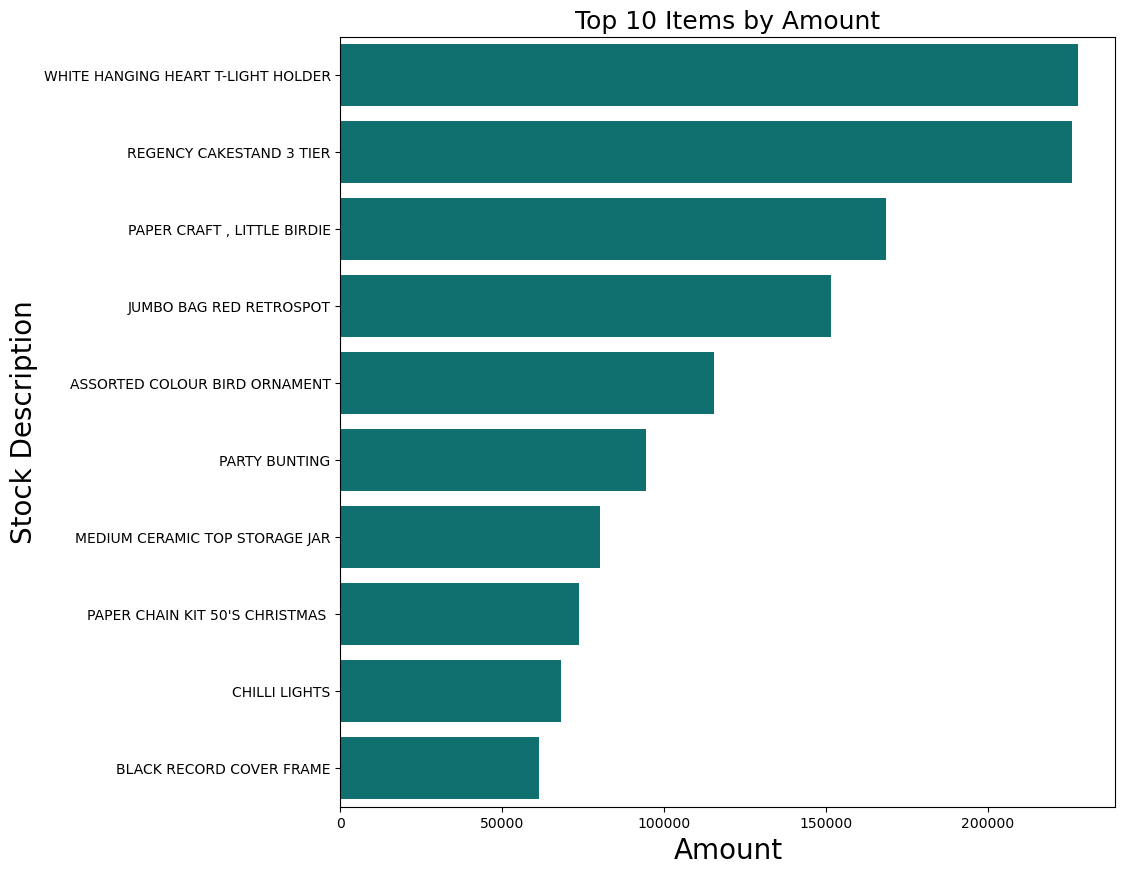

In [59]:
# plot top 10 items with high amount
plt.figure(figsize=(10,10))
temp = retail_cleaned_preprocessed_df.groupby(['StockCode','Stock Description'])['Amount'].sum().reset_index()
temp = temp.sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=temp, y=temp['Stock Description'], x = temp['Amount'], color= 'teal')
plt.title('Top 10 Items by Amount', fontsize=18);

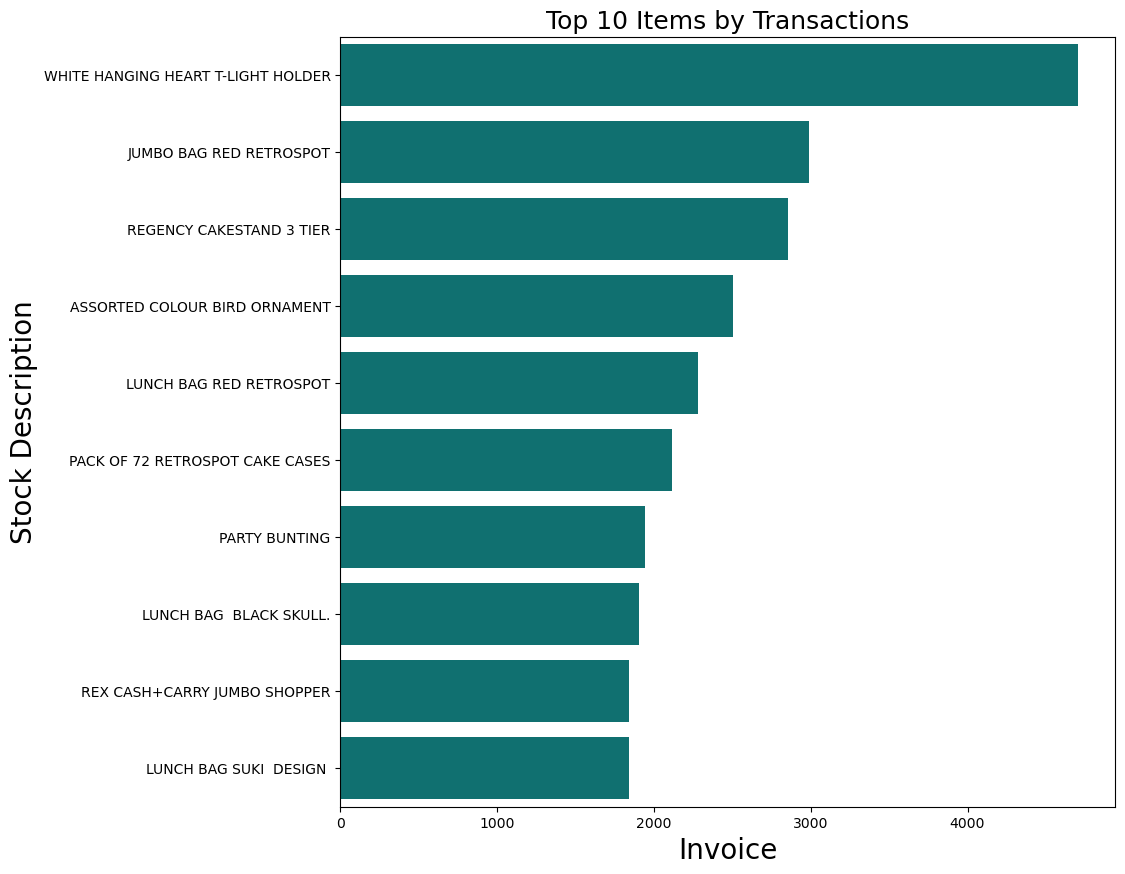

In [85]:
# plot top 10 items with high transaction volumes
plt.figure(figsize=(10,10))
temp = retail_cleaned_preprocessed_df.groupby(['StockCode','Stock Description'])['Invoice'].nunique().reset_index()
temp = temp.sort_values(by='Invoice', ascending=False).head(10)
sns.barplot(data=temp, y=temp['Stock Description'], x = temp['Invoice'], color= 'teal')
plt.title('Top 10 Items by Transactions', fontsize=18)
plt.savefig("../images/top10items.png");

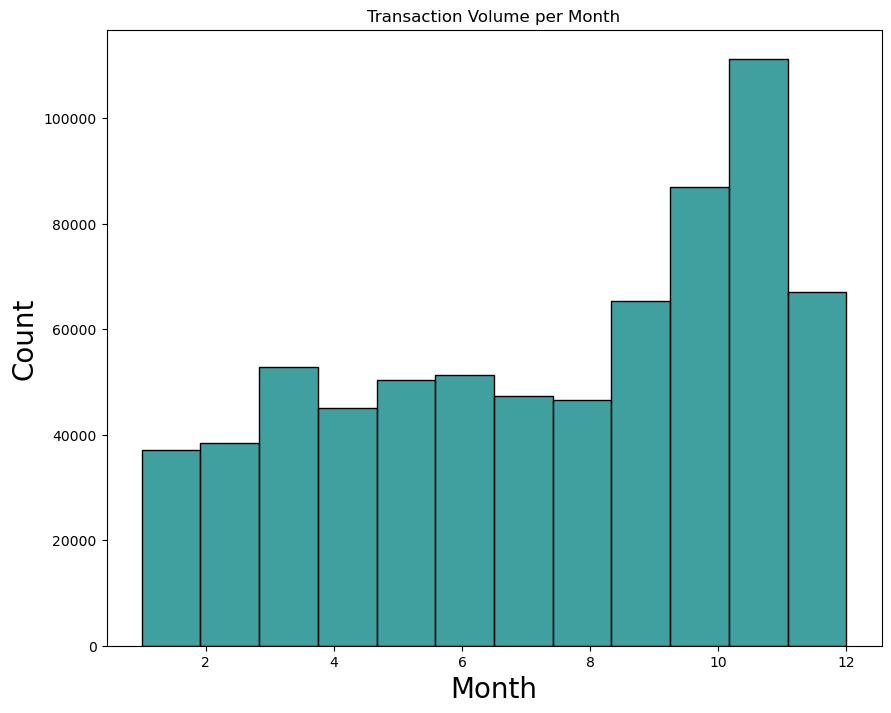

In [86]:
# plot transaction volume by month
plt.figure(figsize=(10,8))
sns.histplot(retail_cleaned_preprocessed_df, x='Month', bins=12, color= 'teal')
plt.title('Transaction Volume per Month')
plt.savefig("../images/salesbymonth.png");

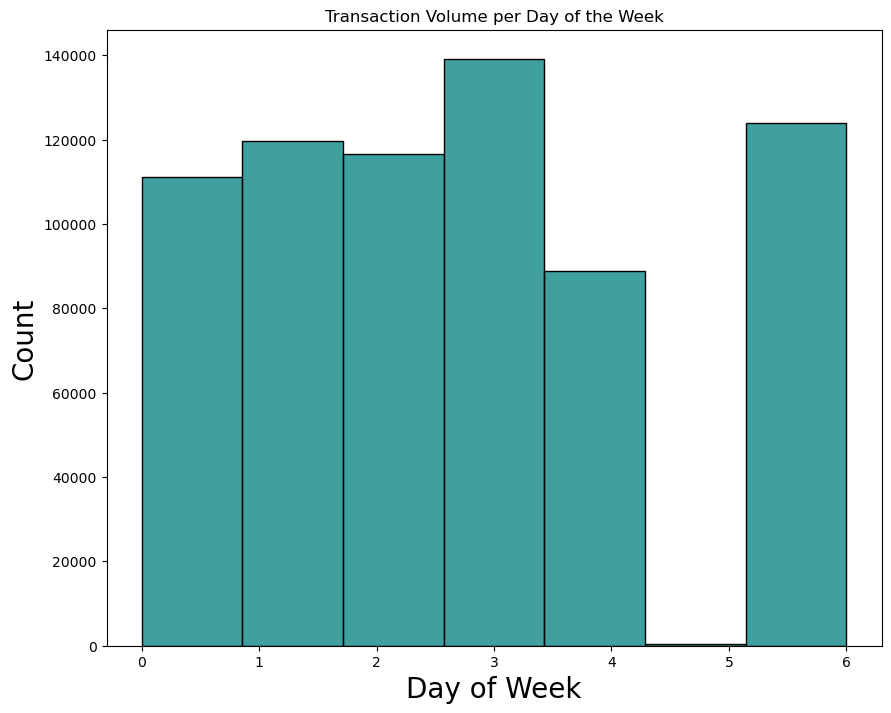

In [62]:
# plot transaction volume by hour
plt.figure(figsize=(10,8))
sns.histplot(retail_cleaned_preprocessed_df, x='Day of Week', bins=7, color='teal')
plt.title('Transaction Volume per Day of the Week');

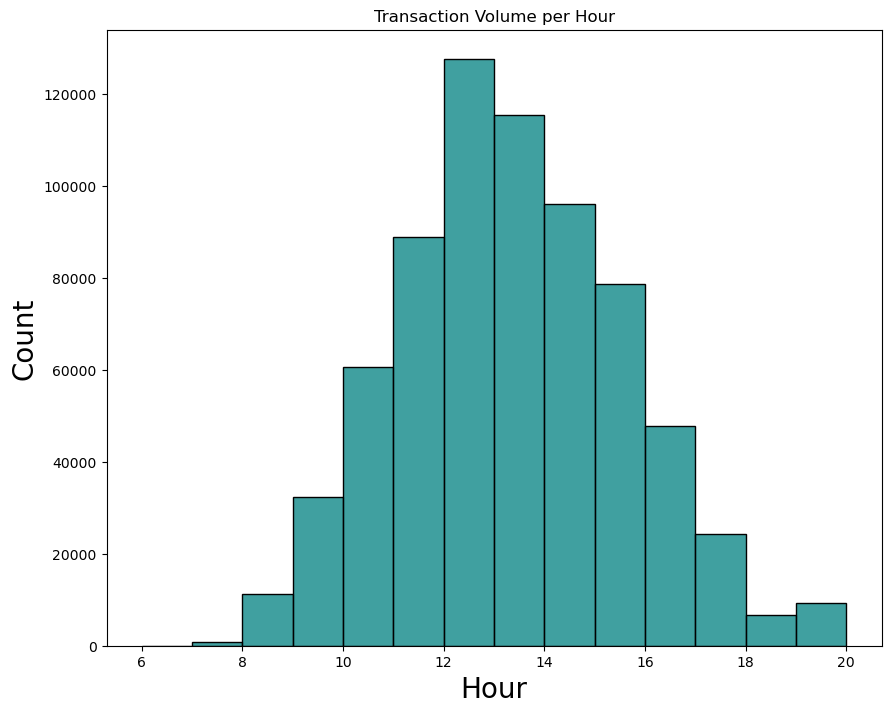

In [63]:
# plot transaction volume by hour
plt.figure(figsize=(10,8))
sns.histplot(retail_cleaned_preprocessed_df, x='Hour', binrange=(6, 20), binwidth=1, color='teal')
plt.title('Transaction Volume per Hour');

## RFM Analysis for Customer Segmentation
---
We use retail technique known as RFM (Recency, Frequency, Monetary) Analysis for Customer Segmentation. Ultimately, we will perform clustering using K-means on the RFM values.
- In usual cases, we often pre-defined a value for R, F, M between 1-5 for the customers, but since we are performing clustering, we will not have to pre-define the 1-5 for the customers. 

**Summary**
The data for RFM are positively skewed, especially for Monetary -> Frequency -> Recency. Hence, we will perform log transformation on them. Although the log transformation only worked better for Monetary data, we are able to reduce the range of values for Frequency and Recency as well.

### Function: RFM
The function below calculates the RFM value for each customers.


In [64]:
def rfm(df, date_col='Invoice Date', trans_col='Invoice', amount_col='Amount'):
    
    '''Input dataframe, date, invoice number, sales amount
    Output customers' RFM dataframe'''
    
    # aggregate metrics on each customer
    customers_df = df.groupby(['Customer ID']).agg(
        Recency = ('Invoice Date', 'max'), # for recency (this is last purchase date)
        Frequency = ('Invoice', 'nunique'), # for frequency
        Monetary = ('Amount', 'sum') # for monetary
        ).reset_index()
    
    # current date set as 1 day after max
    current_date = df['Invoice Date'].max() + timedelta(1)
    customers_df['Recency'] = customers_df['Recency'].apply(lambda x: (current_date - x).days)
    
    
    # === RECENCY ===
    # current date set as 1 day after max
    #current_date = df['Invoice Date'].max() + timedelta(1)
    
    # generate new df for recency based on last purchase date and the date diff
    #recency_df = df.groupby('Customer ID')['Invoice Date'].max().reset_index()
    #recency_df.columns = ['Customer ID', 'Last Purchase']
    #recency_df['Recency'] = recency_df['Last Purchase'].apply(lambda x: (current_date - x).days)
    #recency_df = recency_df.drop(columns='Last Purchase')
    
    # === FREQUENCY ===
    #frequency_df = df.groupby('Customer ID')['Date'].nunique().reset_index()
    #frequency_df.columns = ['Customer ID', 'Frequency']
    
    # === MONETARY ===
    #monetary_df = df.groupby('Customer ID')['Amount'].sum().reset_index()
    #monetary_df.columns = ['Customer ID','Monetary']
    
    return customers_df

In [65]:
customers_rfm = rfm(retail_cleaned_preprocessed_df)
customers_rfm

,Customer ID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12608,405,1,415.79
2,12745,487,2,723.85
3,12746,541,1,254.55
4,12747,3,26,8898.48
...,...,...,...,...
5329,18283,4,22,2658.95
5330,18284,432,1,411.68
5331,18285,661,1,377.00
5332,18286,477,2,1246.43


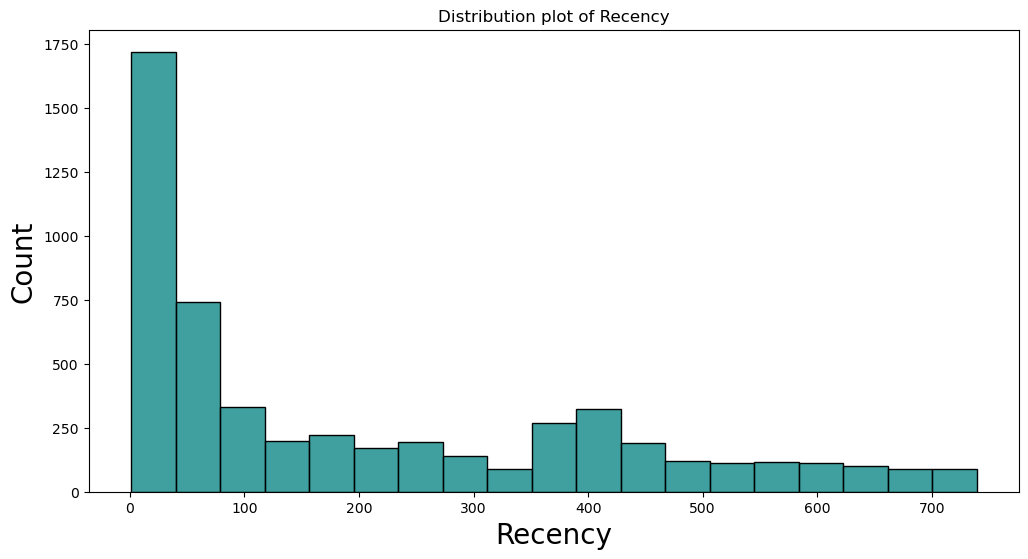

In [66]:
# plot customer recency
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['Recency'], color='teal')
plt.title('Distribution plot of Recency');

<Axes: xlabel='Recency'>

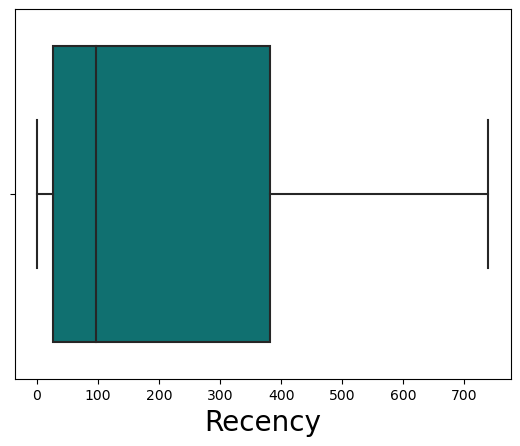

In [67]:
sns.boxplot(data=customers_rfm, x = 'Recency', color='teal')

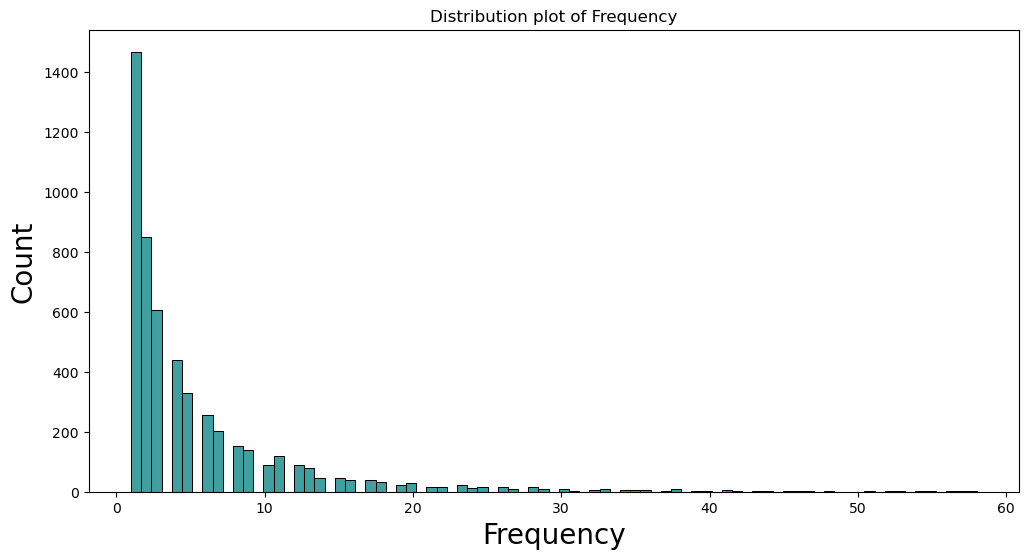

In [68]:
# plot customer frequency
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['Frequency'][customers_rfm.Frequency<60], color='teal')
plt.title('Distribution plot of Frequency');

<Axes: xlabel='Frequency'>

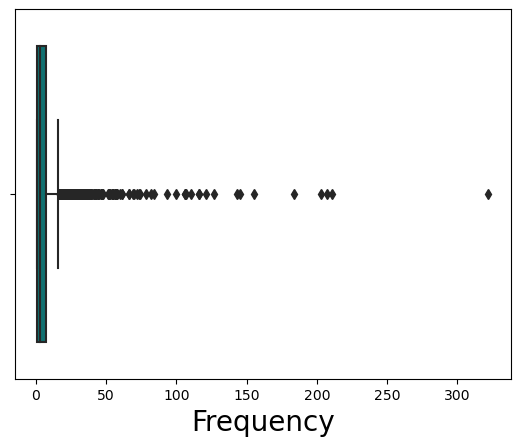

In [69]:
sns.boxplot(data=customers_rfm, x = 'Frequency', color='teal')

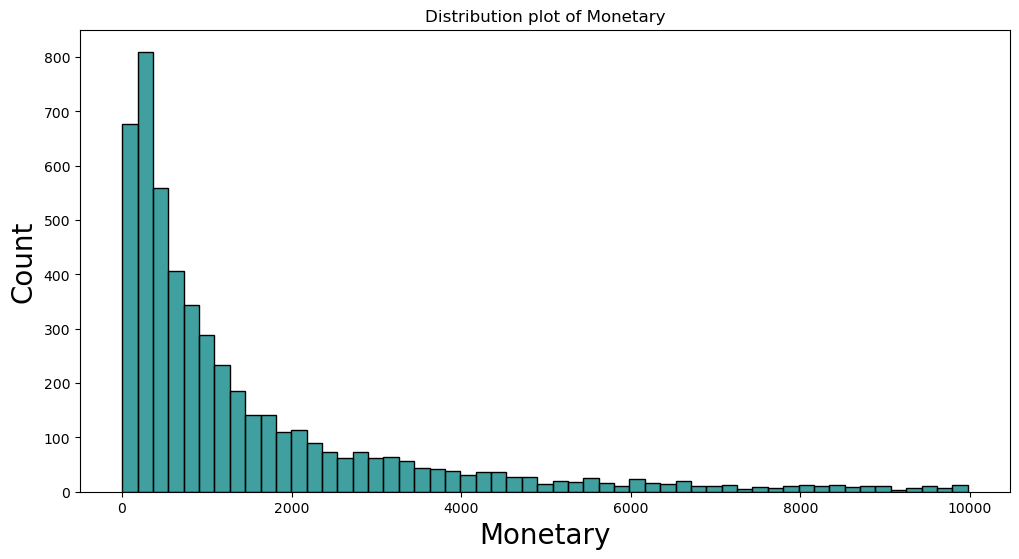

In [70]:
# plot customer monetary
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['Monetary'][customers_rfm.Monetary<10000], color='teal')
plt.title('Distribution plot of Monetary');

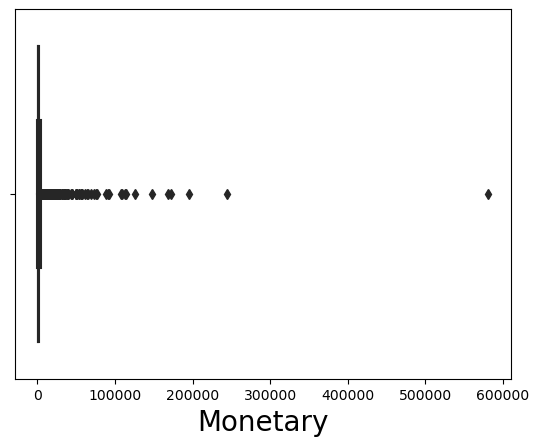

In [71]:
sns.boxplot(data=customers_rfm, x = 'Monetary', color='teal');

In [72]:
customers_rfm['log_r'] = customers_rfm['Recency'].apply(lambda x: log(x))
customers_rfm['log_f'] = customers_rfm['Frequency'].apply(lambda x: log(x))
customers_rfm['log_m'] = customers_rfm['Monetary'].apply(lambda x: log(x))

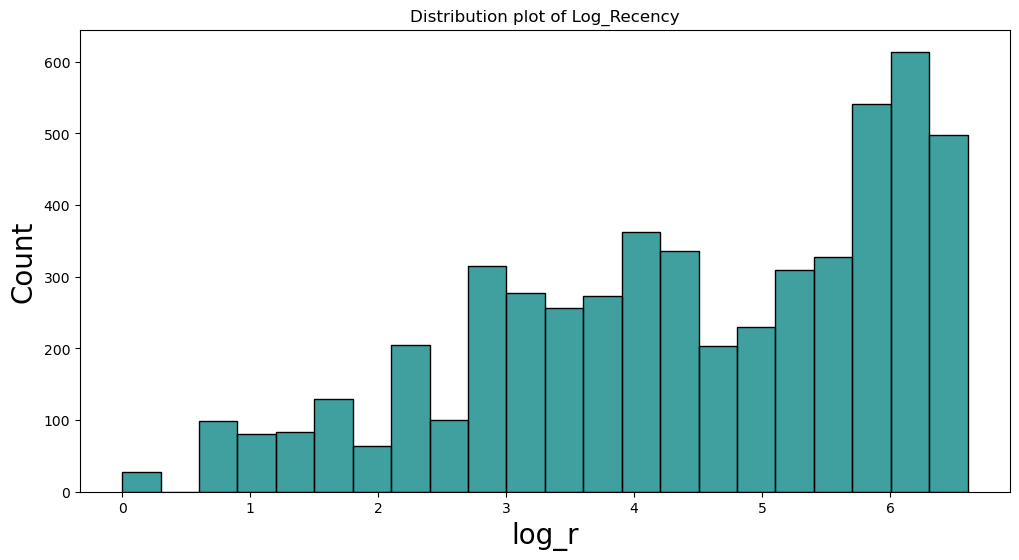

In [73]:
# plot log_f distribution
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['log_r'], color='teal')
plt.title('Distribution plot of Log_Recency');

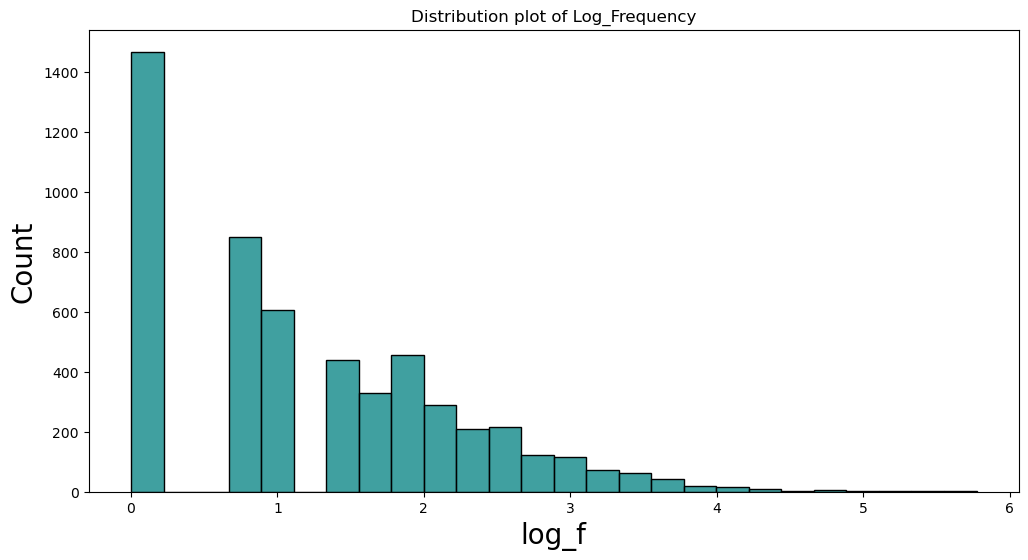

In [74]:
# plot log_f distribution
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['log_f'], color='teal')
plt.title('Distribution plot of Log_Frequency');

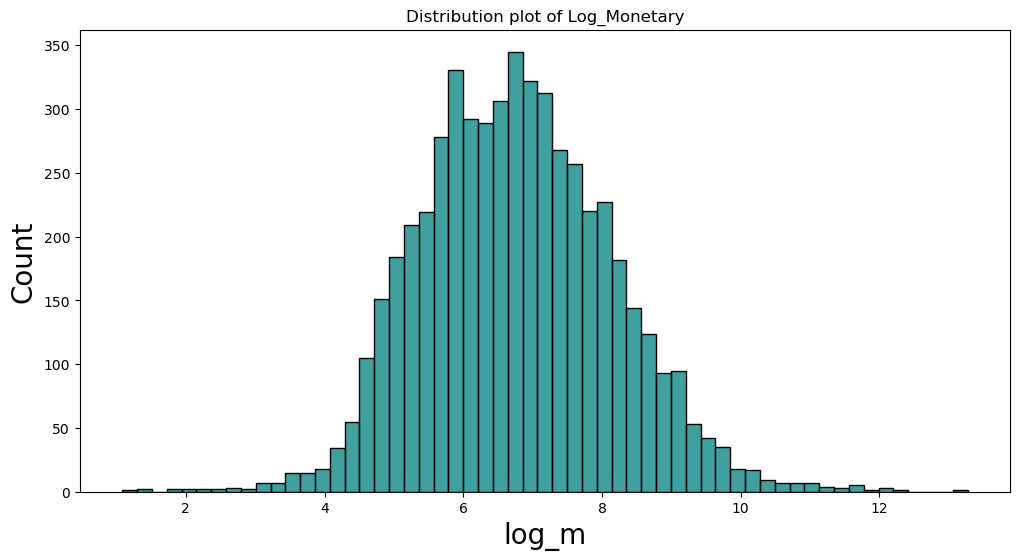

In [75]:
# plot log_m distribution
plt.figure(figsize=(12,6))
sns.histplot(customers_rfm['log_m'],color='teal')
plt.title('Distribution plot of Log_Monetary');

In [76]:
# export into 2 separate csv file

customers_rfm.to_csv('../data/customersrfm.csv', index = False)
retail_cleaned_preprocessed_df.to_csv('../data/retail_cleaned_preprocessed.csv', index = False)

In [77]:
retail_cleaned_preprocessed_df.head(1)

,Invoice,StockCode,Quantity,Invoice DateTime,Price,Customer ID,Country,Stock Description,Amount,Invoice Date,Month,Day of Week,Hour
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,2009-12-01,12,1,7


In [78]:
# Top 10 revenue grossing items

Top10Rev = retail_cleaned_preprocessed_df.groupby('Stock Description', as_index=False)[['Amount', 'Quantity']].sum().sort_values(by='Amount', ascending=False).head(10)
Top10Rev['AvgUnitPrice'] = Top10Rev['Amount'] / Top10Rev['Quantity']


In [79]:
# Total Revenue

TotalRev = round(retail_cleaned_preprocessed_df.Amount.sum(),0)

<Figure size 1500x1500 with 0 Axes>

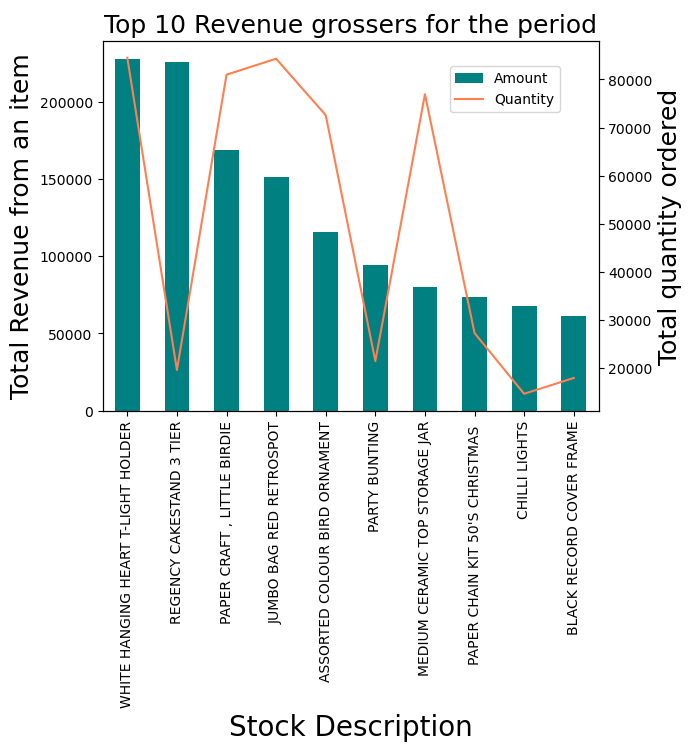

In [80]:

# Plot top 10 revenue grossers

plt.figure(figsize=(15, 15))
ax = Top10Rev.plot(x='Stock Description', y='Amount', legend=False,kind='bar', color='teal')
ax2 = ax.twinx()
Top10Rev.plot(x='Stock Description', y='Quantity', ax=ax2, legend=False, color='coral')
# ax.axhline(TotalRev, c='k', ls='--')
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 Revenue grossers for the period', fontsize=18)
ax.set_ylabel('Total Revenue from an item', fontsize=18)
ax2.set_ylabel('Total quantity ordered', fontsize=18)
plt.show();

In [83]:
#Listing Top10 Revenue Grossers
Top10Rev

,Stock Description,Amount,Quantity,AvgUnitPrice
4368,WHITE HANGING HEART T-LIGHT HOLDER,227965.51,84503,2.697721
3263,REGENCY CAKESTAND 3 TIER,225862.45,19584,11.533009
2711,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995,2.080000
2083,JUMBO BAG RED RETROSPOT,151512.58,84313,1.797025
248,ASSORTED COLOUR BIRD ORNAMENT,115444.33,72577,1.590646
2732,PARTY BUNTING,94525.03,21433,4.410257
2336,MEDIUM CERAMIC TOP STORAGE JAR,80291.44,76919,1.043844
2705,PAPER CHAIN KIT 50'S CHRISTMAS,73564.93,27265,2.698145
875,CHILLI LIGHTS,67996.20,14629,4.648042
442,BLACK RECORD COVER FRAME,61324.55,17918,3.422511
